In [42]:
import tensorflow as tf
import sklearn

In [24]:
cost = tf.reduce_mean(tf.square([1,2,3])) #제곱의 평균

In [25]:
sess = tf.Session()
sess.run(cost)

4

In [30]:
x_data = [1,2,3]
y_data = [1,2,3]

W = tf.Variable(tf.random_uniform([1],-1.0,1.0))
b = tf.Variable(tf.random_uniform([1],-1.0,1.0))

X = tf.placeholder(tf.float32, name ="X")
Y = tf.placeholder(tf.float32, name = "Y")

hypothesis = W*X+b

cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train_op = optimizer.minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(100):
        _,cost_val = sess.run([train_op,cost],feed_dict ={X:x_data,Y:y_data})
        
        print(step,cost_val,sess.run(W),sess.run(b))
    print("\n === Test ===")
    print("X:5, Y:", sess.run(hypothesis,feed_dict={X: 5}))
    print("X: 2.5, Y:", sess.run(hypothesis,feed_dict={X:2.5}))

0 13.928058 [1.082976] [0.24142939]
1 0.17054959 [0.90896] [0.1599531]
2 0.0060151145 [0.9299494] [0.16437848]
3 0.0038607775 [0.92957854] [0.15952303]
4 0.003655067 [0.931496] [0.155787]
5 0.0034811862 [0.9331183] [0.15203121]
6 0.0033158269 [0.93472874] [0.14837766]
7 0.0031583132 [0.9362975] [0.14481062]
8 0.0030082904 [0.9378289] [0.1413295]
9 0.0028654032 [0.9393235] [0.13793205]
10 0.0027292846 [0.94078207] [0.13461626]
11 0.0025996452 [0.9422056] [0.13138016]
12 0.0024761653 [0.943595] [0.12822188]
13 0.0023585397 [0.9449509] [0.1251395]
14 0.0022465116 [0.9462742] [0.12213124]
15 0.0021398002 [0.9475658] [0.1191953]
16 0.00203816 [0.9488263] [0.11632994]
17 0.001941342 [0.95005643] [0.11353343]
18 0.0018491276 [0.95125705] [0.11080417]
19 0.0017612929 [0.9524288] [0.10814052]
20 0.001677629 [0.9535724] [0.1055409]
21 0.0015979366 [0.95468843] [0.10300375]
22 0.0015220408 [0.95577776] [0.10052764]
23 0.0014497396 [0.9568408] [0.09811101]
24 0.0013808762 [0.95787835] [0.09575249]

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data

In [46]:
# from sklearn.datasets.mldata import fetch_mldata
# mnist = fetch_mldata('mnist-original', data_home='/media/Vancouver/apps/mnist_dataset/')
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

In [96]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# autoencoder

In [85]:
learning_rate = 0.01
training_epoch =20 #전체 데이터 학습횟수
batch_size =100 #미니배치로 한번에 학습할 데이터
n_hidden = 256 #은닉층의 갯수
n_input = 28*28 #입력값 크기

In [62]:
X = tf.placeholder(tf.float32,[None,n_input])

W_encode = tf.Variable(tf.random_normal([n_input,n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))

encoder = tf.nn.sigmoid(tf.add(tf.matmul(X,W_encode),b_encode))

In [63]:
W_decode = tf.Variable(tf.random_normal([n_hidden,n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder,W_decode),b_decode))

In [67]:
cost = tf.reduce_mean(tf.pow(X-decoder,2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

In [80]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples/batch_size)

In [86]:
for epoch in range(training_epoch):
    total_cost =0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _,cost_val = sess.run([optimizer,cost],feed_dict={X:batch_xs})
        
        total_cost += cost_val
        
    print('Epoch:','%04d' % (epoch+1), 'Avg.cost=','{:.4f}'.format(total_cost/total_batch))

Epoch: 0001 Avg.cost= 0.2024
Epoch: 0002 Avg.cost= 0.0591
Epoch: 0003 Avg.cost= 0.0490
Epoch: 0004 Avg.cost= 0.0449
Epoch: 0005 Avg.cost= 0.0411
Epoch: 0006 Avg.cost= 0.0395
Epoch: 0007 Avg.cost= 0.0385
Epoch: 0008 Avg.cost= 0.0377
Epoch: 0009 Avg.cost= 0.0367
Epoch: 0010 Avg.cost= 0.0349
Epoch: 0011 Avg.cost= 0.0338
Epoch: 0012 Avg.cost= 0.0326
Epoch: 0013 Avg.cost= 0.0321
Epoch: 0014 Avg.cost= 0.0317
Epoch: 0015 Avg.cost= 0.0315
Epoch: 0016 Avg.cost= 0.0309
Epoch: 0017 Avg.cost= 0.0307
Epoch: 0018 Avg.cost= 0.0305
Epoch: 0019 Avg.cost= 0.0302
Epoch: 0020 Avg.cost= 0.0300


In [87]:
sample_size = 10
samples = sess.run(decoder,feed_dict={X:mnist.test.images[:sample_size]})

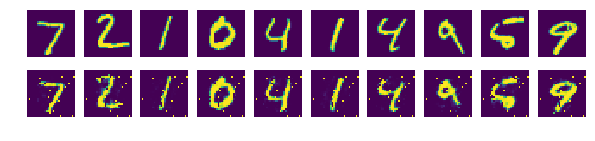

In [106]:
fig,ax=plt.subplots(2,sample_size,figsize=(sample_size,2))#2,10
for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)))
    ax[1][i].imshow(np.reshape(samples[i],(28,28)))
plt.show()

Populating the interactive namespace from numpy and matplotlib


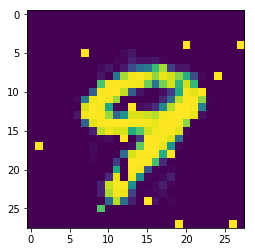

In [ ]:
total_epoch = 100
batch_size = 100
learning_rate=0.0002
